In [1]:
import networkx as nx
import numpy as np
import json
from plotter_lib import *

#from pySankey.sankey import sankey
import plotly.graph_objects as go


In [2]:
Xc = json.load( open("Xc_g2t1.json","r") )
edgelist= np.loadtxt("red_optima.edgelist", dtype=str)
players = sorted(list(set(edgelist[:,0].tolist()+edgelist[:,1].tolist())), key= lambda s:int(s.split("er")[-1]))

colorDict= json.load( open("colorDict.json","r") )

players


['Player1',
 'Player2',
 'Player3',
 'Player4',
 'Player5',
 'Player6',
 'Player7',
 'Player8',
 'Player9',
 'Player10']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


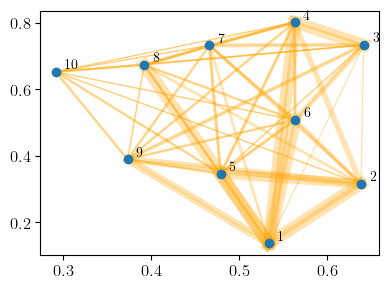

In [3]:

plot = Plotter()

# plot centros
C = np.array([ [Xc[player]["xc"], Xc[player]["yc"]] for player in players])
plot.ax.scatter( C[:,0], C[:,1], zorder=3 )

# nombre jugadores
delta=0.01
for player in Xc.keys():
    plot.ax.annotate(  player.split("r")[-1], xy=( Xc[player]["xc"]+delta , Xc[player]["yc"]+delta )  )

    
# plot link
for link in edgelist:

    n1,n2,w = link[0],link[1], int(link[2])

    x1,y1 = Xc[n1]["xc"], Xc[n1]["yc"]
    x2,y2 = Xc[n2]["xc"], Xc[n2]["yc"]

    if w>0:
        plot.ax.plot( [x1,x2], [y1,y2], linewidth= int(w) , alpha=0.3, c='orange')



plot.show()


In [ ]:
x,y=[],[]

for e in edgelist:

    p1,p2, n = e[0], e[1], int(e[2])

    for i in range(n):
        x.append(p1)
        y.append(p2)



#sankey(x,y, fontsize=12, aspect=20, colorDict=colorDict)

